## --> Collect Data

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
Data = pd.read_csv('NYC.csv')

In [77]:
Data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [78]:
print(str(len(Data.index)))

48895


In [79]:
Data.columns.values

array(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'], dtype=object)

#### Count missing values in each column
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False" means the value is present in the dataset. In the body of the for loop the method ".value_counts()" counts the number of "True" values.

In [80]:
missing_data = Data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

id
False    48895
Name: id, dtype: int64

name
False    48879
True        16
Name: name, dtype: int64

host_id
False    48895
Name: host_id, dtype: int64

host_name
False    48874
True        21
Name: host_name, dtype: int64

neighbourhood_group
False    48895
Name: neighbourhood_group, dtype: int64

neighbourhood
False    48895
Name: neighbourhood, dtype: int64

latitude
False    48895
Name: latitude, dtype: int64

longitude
False    48895
Name: longitude, dtype: int64

room_type
False    48895
Name: room_type, dtype: int64

price
False    48895
Name: price, dtype: int64

minimum_nights
False    48895
Name: minimum_nights, dtype: int64

number_of_reviews
False    48895
Name: number_of_reviews, dtype: int64

last_review
False    38843
True     10052
Name: last_review, dtype: int64

reviews_per_month
False    38843
True     10052
Name: reviews_per_month, dtype: int64

calculated_host_listings_count
False    48895
Name: calculated_host_listings_count, dtype: int64

availability_365
False

#### Based on the summary above,four columns containing missing data:

"name": 16 missing data ; 
"host_name": 21 missing data ; 
"last_review": 10052 missing data ; 
"reviews_per_month": 10052 missing data

#### Deal with missing data
How to deal with missing data?
drop data

    a. drop the whole row
    b. drop the whole column
    
replace data

    a. replace it by mean
    b. replace it by frequency
    c. replace it based on other functions


array(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'], dtype=object)

 - 'id', 'name', 'host_id', 'host_name'- are getting dropped as they don't contain any informations that can be practically used.
 - 'number_of_reviews' - data in this column would be highly dependable on the guest's diligence.
 - 'reviews_per_month','last_review' - subsequently to said above, not to be used.

In [81]:
Data.drop(['id', 'name', 'host_id', 'host_name', 'number_of_reviews','reviews_per_month','last_review'], axis=1, inplace=True)

In [82]:
Data.columns.values

array(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365'], dtype=object)

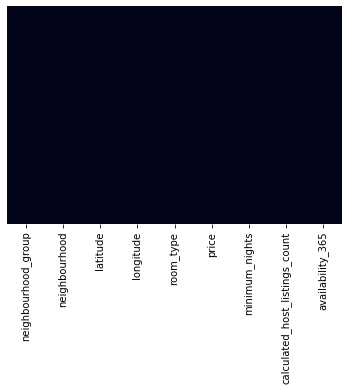

In [83]:
sns.heatmap(Data.isnull(), yticklabels=False, cbar=False)

#### No missing values

In [84]:
Data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,1,0


In [85]:
print("room_type : ", Data["room_type"].unique())
print("neighbourhood_group : ", Data["neighbourhood_group"].unique())

room_type :  ['Private room' 'Entire home/apt' 'Shared room']
neighbourhood_group :  ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


## --> Analyze Data

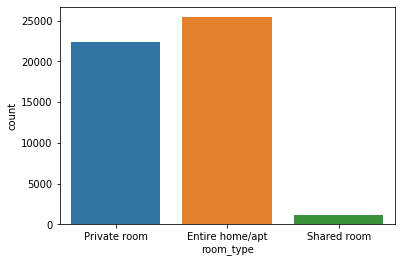

In [86]:
# creating different plot
sns.countplot(x='room_type', data=Data)

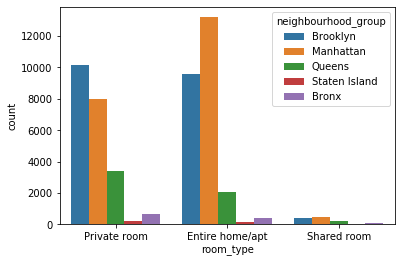

In [87]:
sns.countplot(x='room_type', hue='neighbourhood_group', data=Data)

In [88]:
# Average price of prices
def get_price(data, neighbourhood):
    list_price = [data["price"][i] for i in range(len(data)) if data["neighbourhood_group"][i] == neighbourhood]
    return list_price

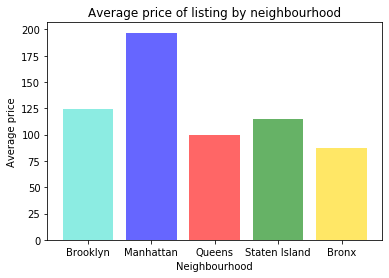

In [89]:
brooklyn_list = get_price(Data, "Brooklyn")
manhattan_list = get_price(Data, "Manhattan")
queens_list = get_price(Data, "Queens")
staten_island_list = get_price(Data, "Staten Island")
bronx_list = get_price(Data, "Bronx")

averages_list = [np.average(brooklyn_list), np.average(manhattan_list), np.average(queens_list), np.average(staten_island_list), np.average(bronx_list)]
unique_neighbourhoods = list(Data["neighbourhood_group"].unique())
color_list = ["turquoise", "blue", "red", "green", "gold"]
plt.bar(x=unique_neighbourhoods, height=averages_list, color=color_list, alpha=0.6)
plt.title("Average price of listing by neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Average price")
plt.show()


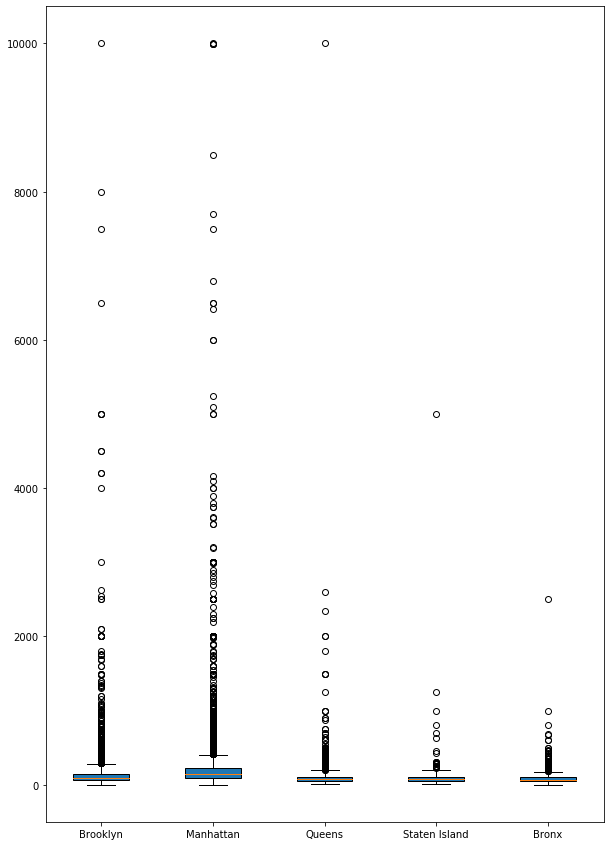

In [90]:
from matplotlib.pyplot import figure
figure(figsize=(10,15))
plt.boxplot(x=[brooklyn_list, manhattan_list, queens_list, staten_island_list, bronx_list], patch_artist=True, labels=unique_neighbourhoods)
plt.show()

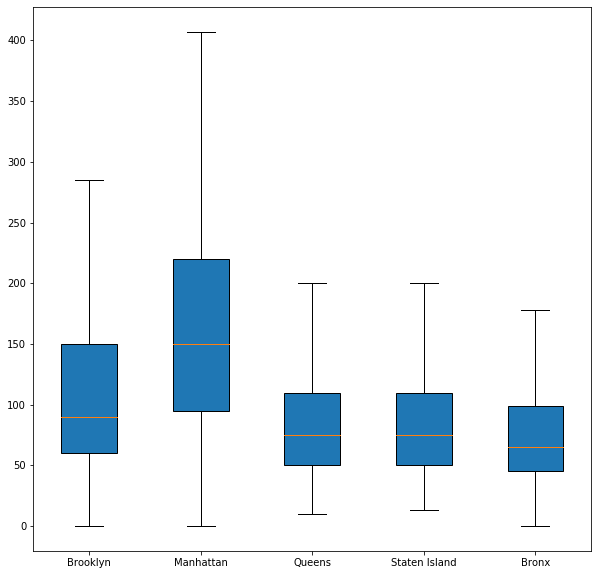

In [91]:
figure(figsize=(10,10))
plt.boxplot(x=[brooklyn_list, manhattan_list, queens_list, staten_island_list, bronx_list], patch_artist=True, labels=unique_neighbourhoods, showfliers=False)
plt.show()